In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import sys

def next_state(state, action, action_level):
    next_state = state.copy()
    if (action > 2*action_level) or action < 0:
        print("action = ", action)
        sys.exit("error, action undefined! nxt")

    if action >= 1 and action <= action_level:
        # then buy
        
        if state['HandCash'] > 0:
            next_state['HandCash'] = state['HandCash']*(1 - action/action_level)
            next_state['NumStock'] = state['NumStock'] + \
                                     (state['HandCash']/state['StockPrice'])*(action/action_level)

    elif action >= (action_level + 1) and action <= (action_level + action_level) :
        # then sell
        
        if state['NumStock'] > 0:
            next_state['NumStock'] = state['NumStock']*(1 - (action-action_level)/action_level)
            next_state['HandCash'] = state['HandCash'] + \
                                     (state['StockPrice']*state['NumStock'])*((action-action_level)/action_level)
    
    return next_state


def reward(state, init_invest):
    return (state['NumStock']*state['StockPrice'] + state['HandCash']) - init_invest

def my_reward(curr, last):
    return (curr['NumStock']*curr['StockPrice'] + curr['HandCash']) - \
           (last['NumStock']*last['StockPrice'] + last['HandCash'])

##### lists of data in each folder: copy and paste into the cell below
* ../input/  
inputFolderFormat = "../input/{0}"
inputCsvList = ['QCOM.csv', 'GOOG.csv', 'NOK.csv', '^DJI.csv', '^TWII.csv', 
           '^N225.csv', '^GDAXI.csv', '^IXIC.csv', '^KS11.csv', '^SSEC.csv', 
           'NSU.DE_10_5_5.csv', 'DAI.DE_10_5_5.csv', 'BMW.DE_10_5_5.csv', 
           '0050.TW.csv', '1216.TW.csv', '1301.TW.csv', '2002.TW.csv', 
           '2330.TW.csv', '2409.TW.csv', '2454.TW.csv', '1704.TW.csv']

* ../input/2001_2010/  
inputFolderFormat = "../input/2001_2010/{0}"
inputCsvList = ['QCOM.csv', 'NOK.csv', '^DJI.csv', '^TWII.csv', 
            '^N225.csv', '^GDAXI.csv', '^IXIC.csv', '^KS11.csv', 
            '^SSEC.csv', 'NSU.DE.csv', 'DAI.DE.csv', 'BMW.DE.csv']  
            
* ../input/fall/  
inputFolderFormat = "../input/fall/{0}"  
inputCsvList = ['1314.TW.csv', '2323.TW.csv', '2349.TW.csv', 
'2353.TW.csv', '2405.TW.csv', '2409.TW.csv', '2601.TW.csv', 
'2885.TW.csv', '2888.TW.csv', '6116.TW.csv']                  

In [3]:
from random import randint
import math

inputFolderFormat = "../input/fall/{0}"  
inputCsvList = ['1314.TW.csv', '2323.TW.csv', '2349.TW.csv', 
'2353.TW.csv', '2405.TW.csv', '2409.TW.csv', '2601.TW.csv', 
'2885.TW.csv', '2888.TW.csv', '6116.TW.csv'] 

inputFolderFormat = "../input/{0}" 
inputCsvList = ['1704.TW.csv']

inputFolderFormat = "../input/{0}"
inputCsvList = ['0050.TW.csv', '1216.TW.csv', '1301.TW.csv', '2002.TW.csv', '2330.TW.csv', '2409.TW.csv', '2454.TW.csv',
         '1704.TW.csv']

action_level = 3
init_invest = 10000

for resource_data in inputCsvList:

    input_csv = inputFolderFormat.format(resource_data)
    qcom = pd.read_csv(input_csv)
    qclose = qcom['Close']
    qclose = qclose.fillna(method='ffill')
    qclose = qclose.tolist()
    np.isnan(qclose).any()

    state = {'NumStock': 0, 'StockPrice': qclose[0], 'HandCash': init_invest}
    last_state = {'NumStock': 0, 'StockPrice': qclose[0], 'HandCash': init_invest}

    for point in range(0, len(qclose)):

        # shift
        last_state['NumStock'] = state['NumStock']
        last_state['StockPrice'] = state['StockPrice']
        last_state['HandCash'] = state['HandCash']
        # new price revealed!
        state['StockPrice'] = qclose[point]


        # determine the next state
        if state['StockPrice'] > last_state['StockPrice']:
            act = action_level
        elif state['StockPrice'] < last_state['StockPrice']:
            act = 2*action_level
        else:
            act = 0

        state = next_state(state, act, action_level)
    
    print(resource_data, state['HandCash'] + state['StockPrice']*state['NumStock'] - 10000)

0050.TW.csv 4508.210480038175
1216.TW.csv -3696.9224993917096
1301.TW.csv -1843.9271580569339
2002.TW.csv -2471.397997318152
2330.TW.csv 821.7046712689917
2409.TW.csv -2514.368241987726
2454.TW.csv 2943.9445309126204
1704.TW.csv 6757.68505593569


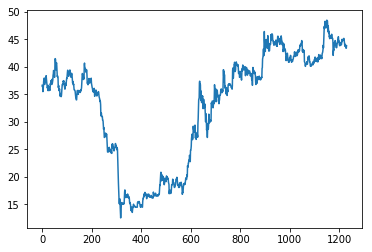

In [4]:
plt.plot(qclose)